In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import statistics as st
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

In [ ]:
# importing data from drive
data = pd.read_json('/content/drive/MyDrive/AI-3/Project/fgrezes:WIESP2022-NER/WIESP2022-NER-TRAINING.jsonl', lines=True)
tags = pd.read_json('/content/drive/MyDrive/AI-3/fgrezes:WIESP2022-NER/ner_tags.json', lines=True)

In [ ]:
# Having a quick look at data
data.head()

bibcode  label_studio_id  \
0  2019MNRAS.486.5558S              487   
1  2018MNRAS.478.5533F             1129   
2  2018MNRAS.480.3062L             1086   
3  2016MNRAS.457.1786M             1135   
4  2019MNRAS.482L...9B              559   

                                             ner_ids  \
0  [62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...   
1  [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...   
2  [62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...   
3  [22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...   
4  [62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...   

                                            ner_tags          section  \
0  [O, O, O, O, O, O, O, B-Instrument, O, O, O, O...         fulltext   
1  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...         fulltext   
2  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  acknowledgments   
3  [B-Person, O, O, O, O, B-Organization, B-Grant...  acknowledgments   
4  [O, O, O, B-Person, I-Person, B-Person, I-Pers...  acknowledgments   

                                              tokens  \
0  [Whilst, a, reasonable, harmonic, fit, to, the...   
1  [comparison, once, the, angular, positions, of...   
2  [ACKNOWLEDGEMENTS, The, authors, thank, an, an...   
3  [BDM, gratefully, acknowledges, support, from,...   
4  [ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...   

                                  unique_id  
0          fulltext_487_2019MNRAS.486.5558S  
1         fulltext_1129_2018MNRAS.478.5533F  
2  acknowledgments_1086_2018MNRAS.480.3062L  
3  acknowledgments_1135_2016MNRAS.457.1786M  
4   acknowledgments_559_2019MNRAS.482L...9B

In [ ]:
# Performing train test split
train_data, test_data = train_test_split(data, train_size=0.8, random_state=1)

In [ ]:
# Having  quick look at tags
tags = tags.T.reset_index()
tags.head(10)

index  0
0                 B-Archive  0
1         B-CelestialObject  1
2   B-CelestialObjectRegion  2
3         B-CelestialRegion  3
4                B-Citation  4
5           B-Collaboration  5
6       B-ComputingFacility  6
7                B-Database  7
8                 B-Dataset  8
9  B-EntityOfFutureInterest  9

In [ ]:
def collect_and_unique(df,col,unique=True):
  '''
  '''
  collect_list = []
  for row in df[col]:
    for item in row :
      collect_list.append(item)
    
  unique_list = list(set(collect_list))
  if unique:
    return unique_list
  else:
    return collect_list

In [ ]:
unique_tag_list = collect_and_unique(train_data,"ner_tags",unique=True)
tag_list = collect_and_unique(train_data,"ner_tags",unique=False)

In [ ]:
unique_id_list = collect_and_unique(train_data,"ner_ids",unique=True)
id_list = collect_and_unique(train_data,"ner_ids",unique=False)

In [ ]:
len(unique_tag_list), len(unique_id_list)

(63, 63)

In [ ]:
non_o_tag = [i for i in tag_list if i != 'O']

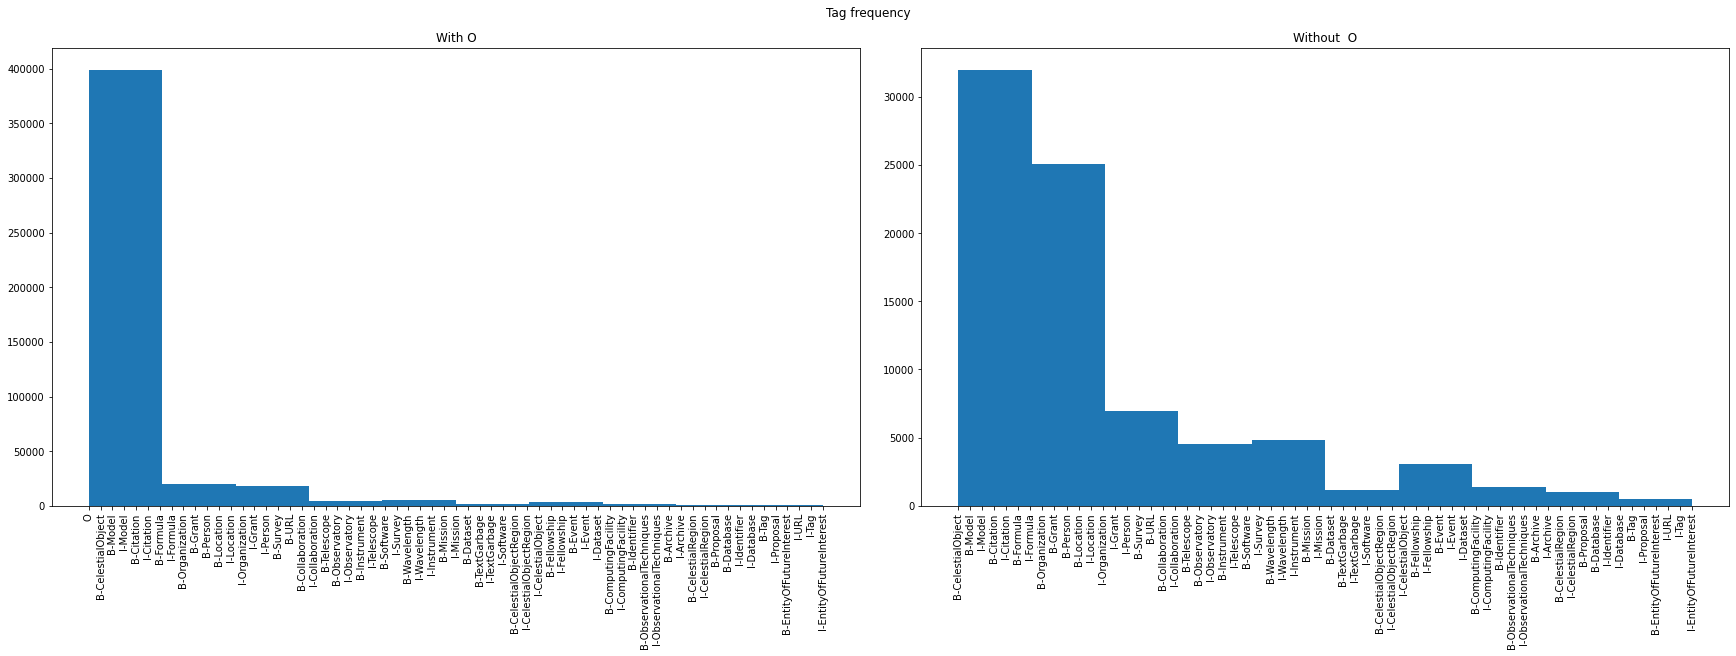

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(24,9),constrained_layout=True)
fig.suptitle('Tag frequency')
ax1.hist(tag_list)
ax1.tick_params(axis='x', rotation=90)
ax1.title.set_text('With O')
ax2.hist(non_o_tag)
ax2.tick_params(axis='x', rotation=90)
ax2.title.set_text('Without  O')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=tag_list)]).update_xaxes(categoryorder='total descending')
fig.update_layout(title_text='Tag Frequency with O', title_x=0.5)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Histogram(x=non_o_tag)]).update_xaxes(categoryorder='total descending')
fig.update_layout(title_text='Tag Frequency without O', title_x=0.5)
fig.show()

In [ ]:
train_data['section'].unique(), train_data['section'].nunique()

(array(['fulltext', 'acknowledgments'], dtype=object), 2)

In [ ]:
# Having a quick look at the B,I,O distribution
print("""
B tags:""")
print(tags['index'].loc[:30])
print("""
I tags:""")
print(tags['index'].loc[31:61])
print("""
O tags:""")
print(tags['index'].loc[62])


B tags:
0                     B-Archive
1             B-CelestialObject
2       B-CelestialObjectRegion
3             B-CelestialRegion
4                    B-Citation
5               B-Collaboration
6           B-ComputingFacility
7                    B-Database
8                     B-Dataset
9      B-EntityOfFutureInterest
10                      B-Event
11                 B-Fellowship
12                    B-Formula
13                      B-Grant
14                 B-Identifier
15                 B-Instrument
16                   B-Location
17                    B-Mission
18                      B-Model
19    B-ObservationalTechniques
20                B-Observatory
21               B-Organization
22                     B-Person
23                   B-Proposal
24                   B-Software
25                     B-Survey
26                        B-Tag
27                  B-Telescope
28                B-TextGarbage
29                        B-URL
30                 B-Wavelength

In [ ]:
# finding the number of nan values. 
print("The number of nan values in train data ", train_data.isna().sum().sum())
print("The number of nan values in test data ", test_data.isna().sum().sum())

The number of nan values in train data  0
The number of nan values in test data  0


In [ ]:
# Having a closer look at the training data
length_of_tokens = [len(i) for i in train_data.tokens]
print("The length of tokens can range from : ",min(length_of_tokens)," to ",max(length_of_tokens))
print("The mean of length of tokens is : ", round(np.mean(length_of_tokens),4))
print("The median of length of tokens is : ", round(np.median(length_of_tokens),4))
print("The number of tokens in training data",len(train_data.tokens))

The length of tokens can range from :  7  to  795
The mean of length of tokens is :  324.1049
The median of length of tokens is :  463.5
The number of tokens in training data 1402


In [ ]:
# Having a closer look at the test data
length_of_tokens = [len(i) for i in test_data.tokens]
print("The length of tokens can range from : ",min(length_of_tokens)," to ",max(length_of_tokens))
print("The mean of length of tokens is : ", round(np.mean(length_of_tokens),4))
print("The median of length of tokens is : ", round(np.median(length_of_tokens),4))
print("The number of tokens in testing data",len(test_data.tokens))

The length of tokens can range from :  8  to  666
The mean of length of tokens is :  338.2821
The median of length of tokens is :  480.0
The number of tokens in testing data 351


In [ ]:
# confirmimg that there are no records where any token does not have corresponding tag in the training data
for i in train_data.index:
 if len(train_data.ner_ids.loc[i]) != len(train_data.tokens.loc[i]):
   print(i)

In [ ]:
# creating a reference_dataset and predictions_dataset for later use
reference_data = test_data[['unique_id','ner_tags']]
predictions_dataset = test_data[['unique_id']]

In [ ]:
# creating a column called unit number
train_data['Unit #'] = train_data.index

#We set the index as the unit number. Then we filter each unit, joininig the text
train_data.set_index('Unit #', inplace=True)

In [ ]:
# creating a column called unit number for test data
test_data['Unit #'] = test_data.index
reference_data['Unit #'] = reference_data.index

# We set the index as the unit number. Then we filter each unit, joininig the text
test_data.set_index('Unit #', inplace=True)
reference_data.set_index('Unit #', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Having a quick look at the reference data
reference_data.head()

unique_id  \
Unit #                                            
1085           fulltext_671_2020MNRAS.499.1140A   
968           fulltext_1390_2017MNRAS.466.1733B   
47            fulltext_1656_2016ApJ...831..201L   
1519    acknowledgments_257_2015MNRAS.452.1779S   
535     acknowledgments_928_2016MNRAS.456.1723L   

                                                 ner_tags  
Unit #                                                     
1085    [O, O, O, O, O, B-ObservationalTechniques, I-O...  
968     [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
47      [O, O, B-Wavelength, I-Wavelength, I-Wavelengt...  
1519    [O, O, O, O, O, O, B-Person, I-Person, O, O, O...  
535     [O, O, O, O, O, O, B-Person, I-Person, B-Perso...

In [ ]:
# creating a series which defines that a section is acknowledgments or not 
sec_ak_ind = train_data.section == 'acknowledgments'

In [ ]:
# Exploding ner_ids and tokens
train_data = train_data.explode(['ner_ids','tokens','ner_tags'])
test_data = test_data.explode(['ner_ids','tokens','ner_tags'])

In [ ]:
# One hot encoding if a token belongs to b, i or o
b_i_o = []
for i in train_data['ner_ids']:
  if i == 62:
    b_i_o.append([0,0,1])
  if i >= 0 and i < 31:
    b_i_o.append([1,0,0])
  if i >= 31 and i < 62:
    b_i_o.append([0,1,0])

train_data[['b','i','o']] = b_i_o

# having a quick look at the data for unit
train_data.loc[1]

bibcode  label_studio_id ner_ids ner_tags   section  \
Unit #                                                                    
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
...                     ...              ...     ...      ...       ...   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   
1       2018MNRAS.478.5533F             1129      62        O  fulltext   

            tokens                          unique_id  b  i  o  
Unit #                                                          
1       comparison  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1             once  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1              the  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1          angular  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1        positions  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
...            ...                                ... .. .. ..  
1               we  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1            count  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1              the  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1         fraction  fulltext_1129_2018MNRAS.478.5533F  0  0  1  
1               of  fulltext_1129_2018MNRAS.478.5533F  0  0  1  

[512 rows x 10 columns]

In [ ]:
b_i_o = []
for i in test_data['ner_ids']:
  if i == 62:
    b_i_o.append([0,0,1])
  if i >= 0 and i < 31:
    b_i_o.append([1,0,0])
  if i >= 31 and i < 62:
    b_i_o.append([0,1,0])

test_data[['b','i','o']] = b_i_o

# having a quick look at the data for unit
test_data.loc[0]

bibcode  label_studio_id ner_ids ner_tags   section  \
Unit #                                                                    
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
...                     ...              ...     ...      ...       ...   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   
0       2019MNRAS.486.5558S              487      62        O  fulltext   

            tokens                         unique_id  b  i  o  
Unit #                                                         
0           Whilst  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0                a  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0       reasonable  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0         harmonic  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0              fit  fulltext_487_2019MNRAS.486.5558S  0  0  1  
...            ...                               ... .. .. ..  
0            which  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0           yields  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0                P  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0              rot  fulltext_487_2019MNRAS.486.5558S  0  0  1  
0                =  fulltext_487_2019MNRAS.486.5558S  0  0  1  

[536 rows x 10 columns]

In [ ]:
print("number of b tokens  : ",len(train_data[train_data.b==1]))
print("number of i tokens  : ",len(train_data[train_data.i==1]))
print("number of o tokens  : ",len(train_data[train_data.o==1]))

number of b tokens  :  33150
number of i tokens  :  47348
number of o tokens  :  373897


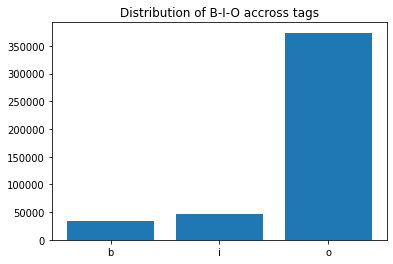

In [ ]:
# Having a quick look at the distribution of the data
plt.bar(['b','i','o'],height=[len(train_data[train_data.b==1]),len(train_data[train_data.i==1]),len(train_data[train_data.o==1])])
plt.title("Distribution of B-I-O accross tags")
plt.show()

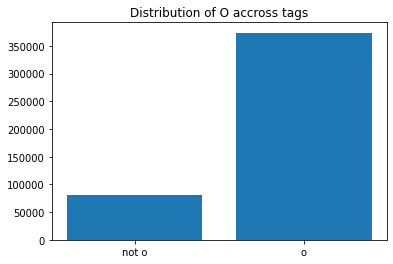

In [ ]:
# Having a quick look at the distribution of the data
plt.bar(['not o','o'],height=[(len(train_data[train_data.i==1])+len(train_data[train_data.b==1])),len(train_data[train_data.o==1])])
plt.title("Distribution of O accross tags")
plt.show()

We can see from the above plots that the 'o' tag is large in number.

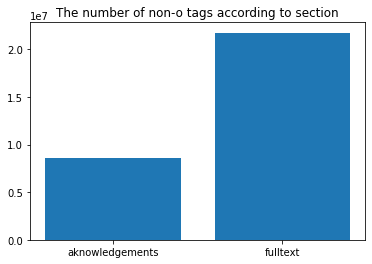

In [ ]:
# having a look at the distribution of non - o tags according to section
unit_dict = {}
for unit_no in list(set(train_data.index)):
  try:
    unit_dict[unit_no] = len(train_data[train_data.o==0].loc[unit_no])
  except:
    unit_dict[unit_no] = 0

ak_ind = sec_ak_ind.index[sec_ak_ind == True].tolist()

ak = 0
full = 0
for i in train_data.index:
  if i in ak_ind:
    ak += unit_dict[i]
  else:
    full += unit_dict[i]

plt.bar(['aknowledgements','fulltext'],[ak,full])
plt.title('The number of non-o tags according to section')
plt.show()